In [1]:
import numpy as np
import matplotlib.pyplot as plt

This script writes out a python script <b> Cscale.py </b> that implements a series of classes that extends the "scalerel" base in the OpenQuake package. Target location of the generated script is the folder: <b> openquake/hazardlib/scalerel</b>.

The magnitude-area scaling considered is in simple form with a single coefficent such that,

log10(A) = Mag-C

where C ranges from 3.8 to 4.3, with step of 0.05. 


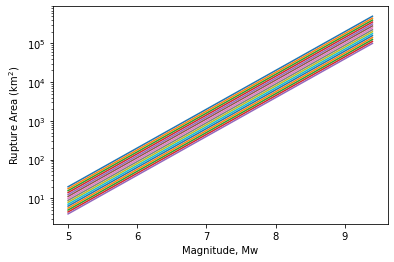

In [2]:
# quick look at the scaling relations
Cs = [round(c,2) for c in np.arange(3.7, 4.45, 0.05)]
mag = [round(m,2) for m in np.arange(5.0, 9.45, 0.05)]

for C in Cs:
    A = [10**(m-C) for m in mag]
    plt.semilogy(mag, A, '-')
plt.xlabel('Magnitude, Mw')
plt.ylabel('Rupture Area (km$^2$)');

In [3]:
def strtag(k):
    t = ('%.2f')%k
    t = t.replace('.', '_')
    return(t)
def gimme_scriptheader(Cs, fname=None, comment=None):
    if fname is None:
        fname = 'Cscale'
    threequotes = "\"\"\"\"\n"
    mytxt = threequotes
    mytxt = mytxt + "Module :mod:`openquake.hazardlib.scalerel." + fname + "' implements\n"
    for C in Cs:
        mytxt = mytxt + ":class: '" + fname + strtag(C) + "'\n"
    mytxt = mytxt + threequotes
    # mytxt = mytxt + "from numpy import power, log10\n"
    mytxt = mytxt + "from openquake.hazardlib.scalerel.base import BaseMSRSigma, BaseASRSigma\n"
    if comment is not None:
        mytxt = mytxt + threequotes + comment + threequotes
    return mytxt

def gimme_scaleclass(C, classname=None):
    if classname is None:
        classname = "Cscale"+ strtag(C)
    mytxt = "\nclass " + classname + "(BaseMSRSigma, BaseASRSigma):\n"
    mytxt = mytxt + "     def get_median_area(self, mag, rake):\n"
    mytxt = mytxt + "            return (10 ** (mag - %.2f)) \n" %C
    return mytxt

In [4]:
comment = "A set of classes that implement simple mag-area scaling: log10(A) = Mw -C\n"
comment = comment + "with coefficient C ranging from 3.70 to 4.40 (with step of 0.05).\n"
comment = comment + "These classes are named with suffix "
comment = comment + "that corresponds to the C. For example, 'Cscale3_70'.\n"

txt = gimme_scriptheader(Cs, comment=comment)
for C in Cs:
    txt = txt + gimme_scaleclass(C)
print(txt)

""""
Module :mod:`openquake.hazardlib.scalerel.Cscale' implements
:class: 'Cscale3_70'
:class: 'Cscale3_75'
:class: 'Cscale3_80'
:class: 'Cscale3_85'
:class: 'Cscale3_90'
:class: 'Cscale3_95'
:class: 'Cscale4_00'
:class: 'Cscale4_05'
:class: 'Cscale4_10'
:class: 'Cscale4_15'
:class: 'Cscale4_20'
:class: 'Cscale4_25'
:class: 'Cscale4_30'
:class: 'Cscale4_35'
:class: 'Cscale4_40'
""""
from openquake.hazardlib.scalerel.base import BaseMSRSigma, BaseASRSigma
""""
A set of classes that implement simple mag-area scaling: log10(A) = Mw -C
with coefficient C ranging from 3.70 to 4.40 (with step of 0.05).
These classes are named with suffix that corresponds to the C. For example, 'Cscale3_70'.
""""

class Cscale3_70(BaseMSRSigma, BaseASRSigma):
     def get_median_area(self, mag, rake):
            return (10 ** (mag - 3.70)) 

class Cscale3_75(BaseMSRSigma, BaseASRSigma):
     def get_median_area(self, mag, rake):
            return (10 ** (mag - 3.75)) 

class Cscale3_80(BaseMSRSigma, BaseASR

In [5]:
with open('Cscale.py', 'w') as f:
    f.write(txt)